# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [3]:
'''
1
Negative Transformation
'''
def NegativeTrans(image_path,threshold=1):
    img=io.imread(image_path,as_gray=True)
    if(threshold>1):
        img=np.array(img*255,dtype=np.uint8)
    img=threshold-img
    return img

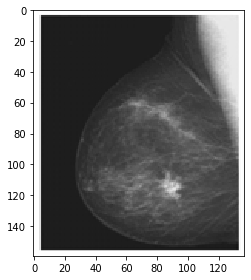

        original


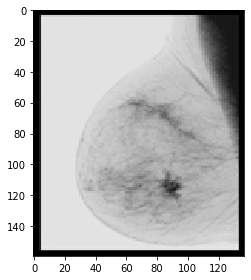

          trans 1


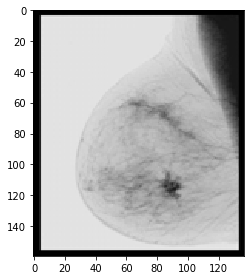

          trans 2


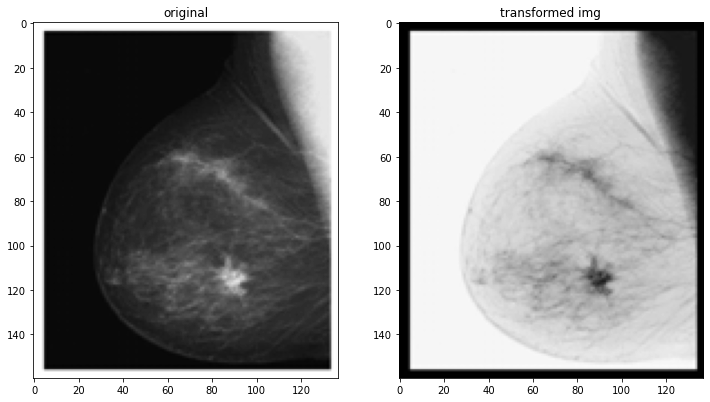

In [6]:
original_img=io.imread("imgs/Picture1.png",as_gray=True)
io.imshow(original_img)
io.show()
print("        original")
trans_img=NegativeTrans("imgs/Picture1.png",1)
trans_img2=NegativeTrans("imgs/Picture1.png",255)
io.imshow(trans_img)
io.show()
print("          trans 1")
io.imshow(trans_img2)
io.show()
print("          trans 2")
show_images([original_img,trans_img],["original","transformed img"])

In [4]:
'''
2
Contrast Enhancement
'''
# the equation is f(x)=1.5*x+150 if(x>=0 and x<=100)
# f(x)=x otherwise
def ContrastEnhancement(image_path):
    img=io.imread(image_path,as_gray=True)
    img=np.array(img*255,dtype=np.uint8)
    Vimg=np.reshape(img,(img.shape[0]*img.shape[1],1))
    targeted_pixels=Vimg[(Vimg>=0) & (Vimg<=100)]
    Vimg[(Vimg>=0) & (Vimg<=100)]=1.5*targeted_pixels+50
    img=np.reshape(Vimg,(img.shape[0],img.shape[1]))
    return img
    

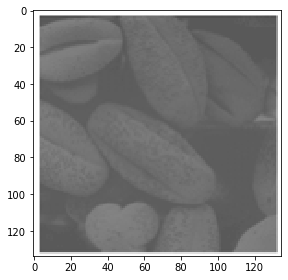

                original


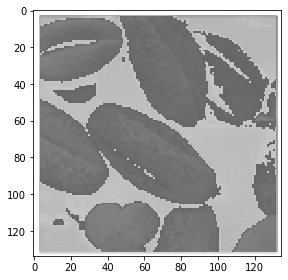

                enhanced


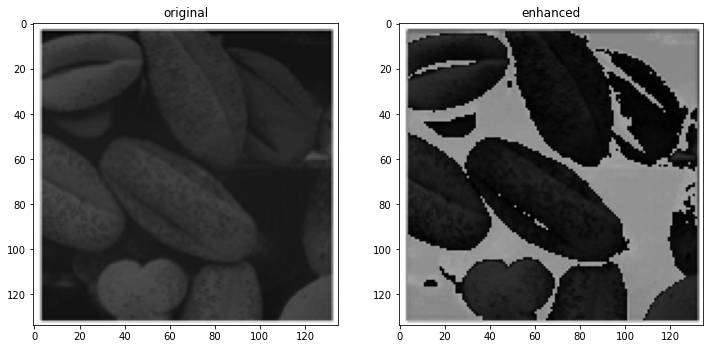

In [5]:
original_img=io.imread("imgs/Picture2.png",as_gray=True)
io.imshow(original_img)
io.show()
print("                original")
enhanced=ContrastEnhancement("imgs/Picture2.png")
io.imshow(enhanced)
io.show()
print("                enhanced")
show_images([original_img,enhanced],["original","enhanced"])

# test=np.zeros((5,1))
# test[0]=0
# test[1]=100
# test[2]=50
# test[3]=150
# print((test>=0) & (test<=100))
# x=test[(test>=0) & (test<=100)]
# print(x)
# test[(test>=0) & (test<=100)]=1.5*x+50
# print(test)

In [6]:
'''
3
Gamma Correction
'''
#here we must read the image as grayScale to be in range from 0 to 1
#if we wanted to deal with images between 0 to 255 the equation will be "(out=255*(input/255)^gamma)"
def GammaCorrection(image_path,c=1,gamma=1):
    img=io.imread(image_path,as_gray=True)
    img=c*np.power(img,gamma)
    return img



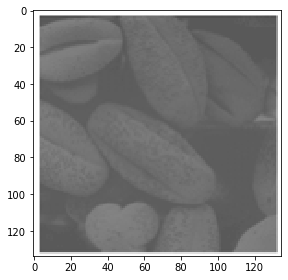

             original


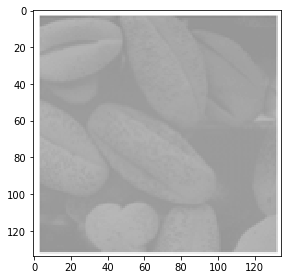

      enhanced with gamma=0.5


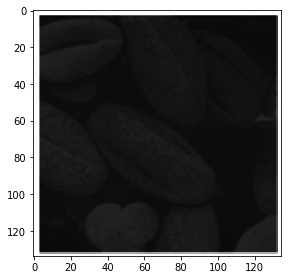

      enhanced with gamma=3


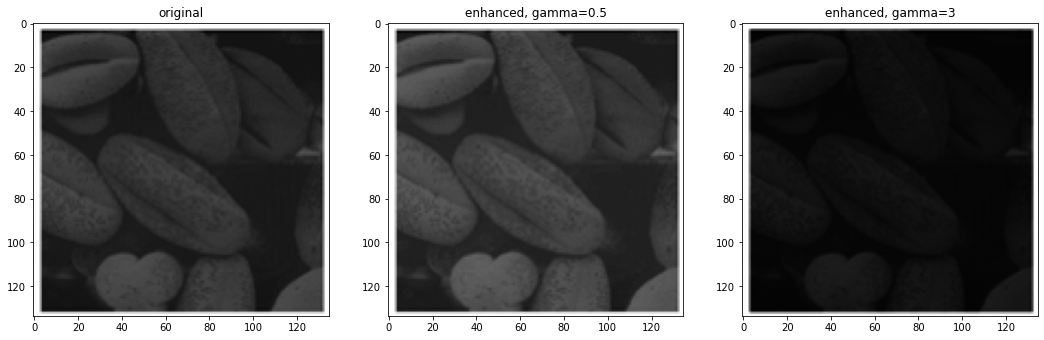

In [7]:
'''
in case of gamma less than 1, we will notice the brightness increased in the picture that's because we are raising values in range
of 0 to 1 to less than 1 power, so the output will have higher values than the input (this effect disappears as the input gets higher)

in case of gamme greater than 1, we will notice that  picture gets darker and the reason is we are raising values in range of 0 to 1
to greater than 1 power, so the output will have lower values than the input (this effect disappears as the input gets higher)

so decreasing gamma will make the image brighter than the original one
'''
original_img=io.imread("imgs/Picture2.png",as_gray=True)
io.imshow(original_img)
io.show()
print("             original")
enhanced=GammaCorrection("imgs/Picture2.png",1,0.5)
io.imshow(enhanced)
io.show()
print("      enhanced with gamma=0.5")
enhanced2=GammaCorrection("imgs/Picture2.png",1,3)
io.imshow(enhanced2)
io.show()
print("      enhanced with gamma=3")
show_images([original_img,enhanced,enhanced2],["original","enhanced, gamma=0.5","enhanced, gamma=3"])


In [8]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(name,ext,nbins=256):
    pass
    


In [9]:
def HistEqualization(image_path):
    img=io.imread(image_path,as_gray=True)
    H=np.zeros((1,256))
    hist=histogram(img)
    for i in range(len(hist[0])):
        H[0,hist[1][i]]=hist[0][i]
    H_C=np.copy(H)
    #np.cumsum()
    for i in range(1,256):
        H_C[0,i]=H_C[0,i]+H_C[0,i-1]
    H_C=H_C/(img.shape[0]*img.shape[1])
    mapping=np.round(255*H_C)
    Vimg=np.reshape(img,(img.shape[0]*img.shape[1],1))
#     for i in range(256):
#         Vimg[Vimg==i]=mapping[0,i]
    for i in range(Vimg.shape[0]):
        index=Vimg[i,0]
        Vimg[i,0]=mapping[0,index] 
#     for i in range(255,-1,-1):
#          Vimg[Vimg==i]=mapping[0,i]
    img=np.reshape(Vimg,(img.shape[0],img.shape[1]))
    return img

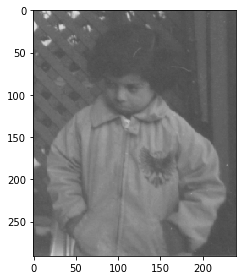

original image


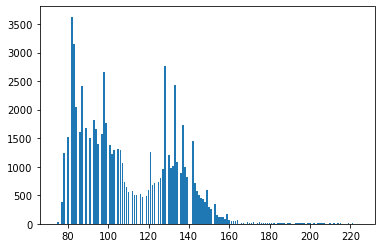

original image histogram


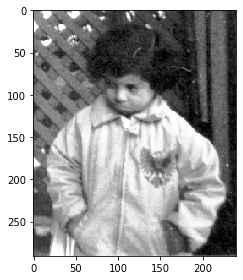

equalized image


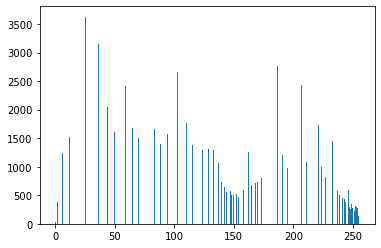

equalized image histogram


In [10]:
original_img=io.imread("imgs/pout.tif",as_gray=True)
io.imshow(original_img)
io.show()
print("original image")
showHist(original_img)
io.show()
print("original image histogram")
equalized_img=HistEqualization("imgs/pout.tif")
io.imshow(equalized_img)
io.show()
print("equalized image")
hist=histogram(equalized_img)
showHist(equalized_img)
io.show()
print("equalized image histogram")

# test=np.ones((5,1))
# test[2]=3
# test[3]=3
# i=5
# test[test==3]=i
# print(test)

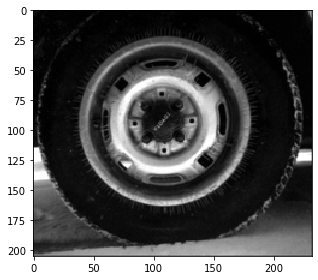

original image


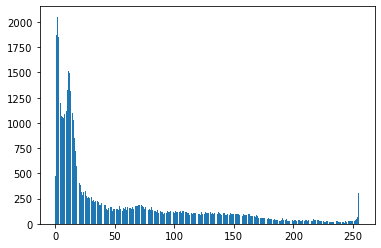

original image histogram


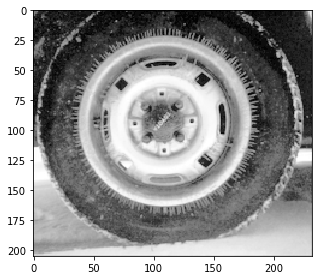

equalized image


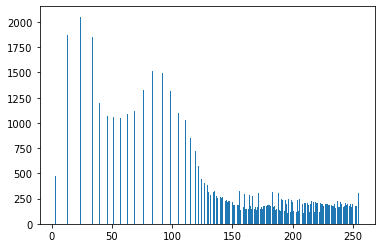

equalized image histogram


In [11]:
original_img=io.imread("imgs/tire.tif",as_gray=True)
io.imshow(original_img)
io.show()
print("original image")
showHist(original_img)
io.show()
print("original image histogram")
equalized_img=HistEqualization("imgs/tire.tif")
io.imshow(equalized_img)
io.show()
print("equalized image")
hist=histogram(equalized_img)
showHist(equalized_img)
io.show()
print("equalized image histogram")